In [1]:
import os
import librosa
import librosa.display
from preprocessing_CREMA import CreamData
import matplotlib.pyplot as plt


2024-08-28 19:39:57.482958: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 19:39:57.557395: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 19:39:57.557438: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 19:39:57.557484: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-28 19:39:57.566753: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 19:39:57.567222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
female_ids = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,
              1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,
              1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,
              1082,1084,1089,1091]
male_ids = list(set(list(range(1001,1092))) - set(female_ids))


In [3]:
creamData = CreamData(
    path = '../data/CREAM-D_wav/AudioWAV/',
    female = female_ids,
    male = male_ids,
    path_to_standardize_audio_data='../ProcessedData',
    spec_augmentation=True,
    standardize_audio=False
)


In [4]:
creamData.make_dataset()
creamData.data.head()

,id,gender,emotion,lable,path
0,1001,male,angry,angry_male,../ProcessedData/1001_DFA_ANG_XX.wav
1,1001,male,disgust,disgust_male,../ProcessedData/1001_DFA_DIS_XX.wav
2,1001,male,fear,fear_male,../ProcessedData/1001_DFA_FEA_XX.wav
3,1001,male,happy,happy_male,../ProcessedData/1001_DFA_HAP_XX.wav
4,1001,male,neutral,neutral_male,../ProcessedData/1001_DFA_NEU_XX.wav


In [5]:
source_path = creamData.data['path'][0]
source_path

'../ProcessedData/1001_DFA_ANG_XX.wav'

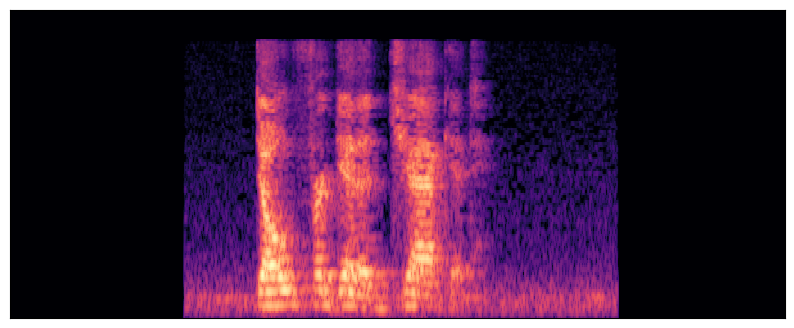

In [6]:
y,sr = librosa.load(source_path)
normal_mel_spec = creamData.compute_mel_spectrogram(y,sr)
plt.figure(figsize= (10,4))
librosa.display.specshow(normal_mel_spec)
plt.show()

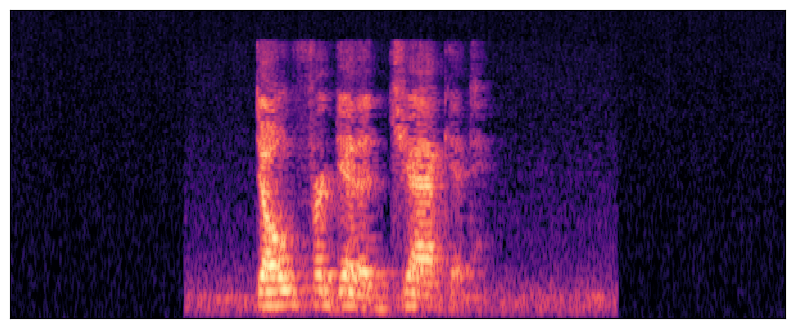

In [7]:
y,sr = librosa.load(source_path)
y = creamData.augmentation_noise(y,0.0005)
normal_mel_spec = creamData.compute_mel_spectrogram(y,sr)
plt.figure(figsize= (10,4))
librosa.display.specshow(normal_mel_spec)
plt.show()

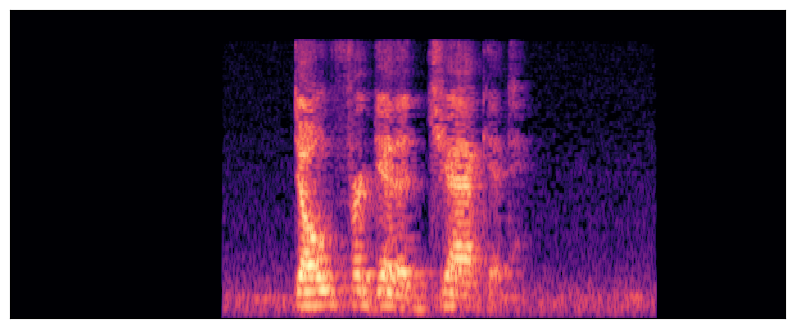

In [8]:
y,sr = librosa.load(source_path)
y = creamData.augmentation_shift(y)
normal_mel_spec = creamData.compute_mel_spectrogram(y,sr)
plt.figure(figsize= (10,4))
librosa.display.specshow(normal_mel_spec)
plt.show()

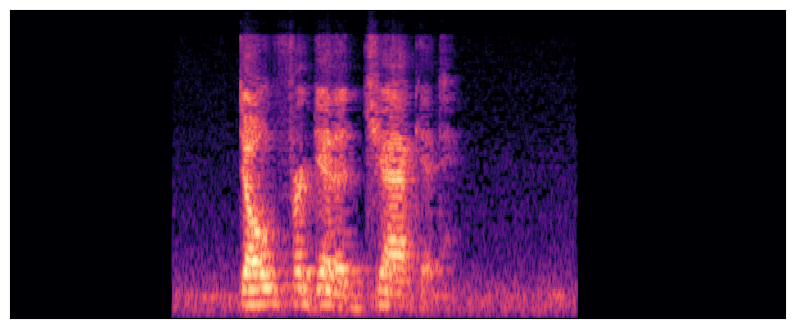

In [9]:
y,sr = librosa.load(source_path)
y = creamData.augmentation_speed_and_pitch(y)
normal_mel_spec = creamData.compute_mel_spectrogram(y,sr)
plt.figure(figsize= (10,4))
librosa.display.specshow(normal_mel_spec)
plt.show()

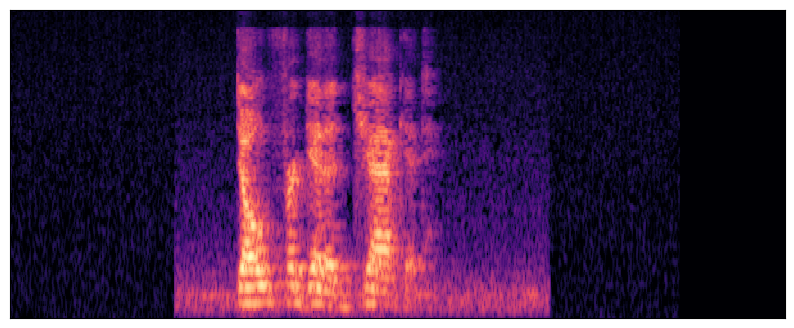

In [10]:
y,sr = librosa.load(source_path)
y = creamData.apply_all_time_augmentations(y)
normal_mel_spec = creamData.compute_mel_spectrogram(y,sr)
plt.figure(figsize= (10,4))
librosa.display.specshow(normal_mel_spec)
plt.show()

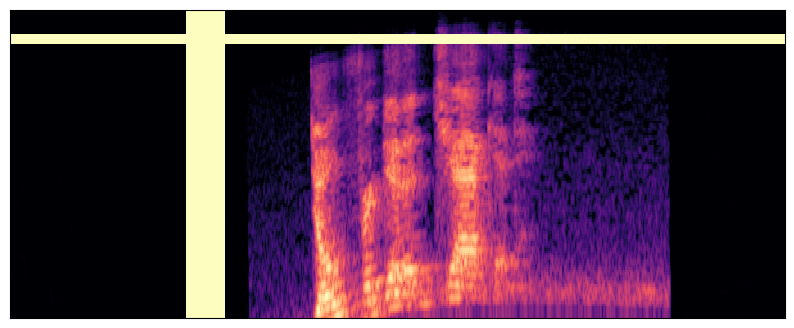

In [39]:
y = creamData.convert_to_final_spec(source_path)
plt.figure(figsize= (10,4))
librosa.display.specshow(y)
plt.show()